In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import  ARIMA

In [20]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq="MS"
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

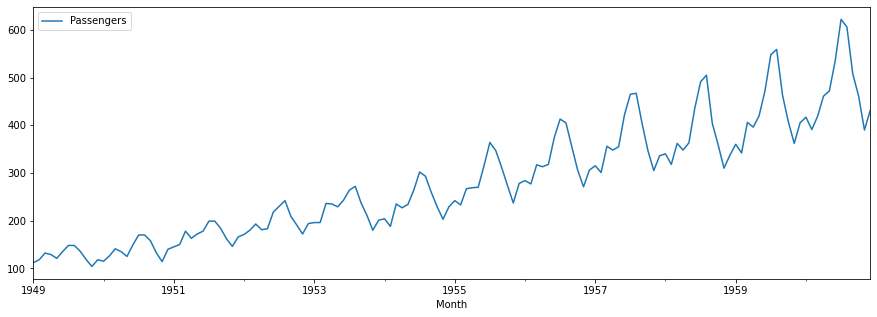

In [21]:
df.plot(figsize=(15,5))

In [22]:
df["1stdiff"]=df["Passengers"].diff()

<AxesSubplot:xlabel='Month'>

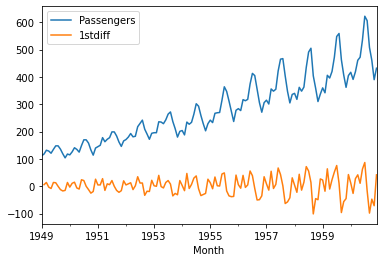

In [23]:
df.plot()

In [24]:
df["LogPassengers"]=np.log(df["Passengers"])

<AxesSubplot:xlabel='Month'>

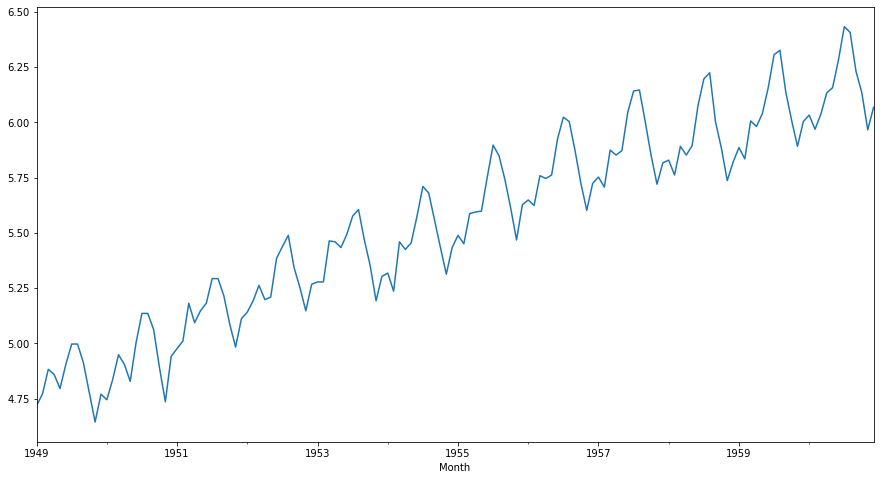

In [25]:
df["LogPassengers"].plot(figsize=(15,8))

In [26]:
N_test = 12
train=df.iloc[:-N_test]
test=df.iloc[-N_test:]

In [27]:
train_idx=df.index <=train.index[-1]
test_idx=df.index >train.index[-1]

In [28]:
arima=ARIMA(train['Passengers'],order=(1,0,0))
arima_result=arima.fit()

In [29]:
df.loc[train_idx,"AR(1)"]=arima_result.predict(start=train.index[0],end=train.index[-1])

<AxesSubplot:xlabel='Month'>

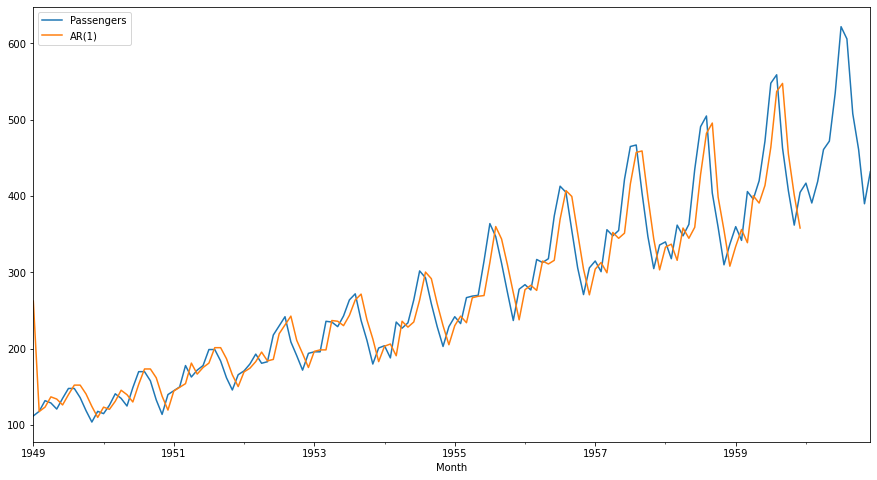

In [30]:
df[["Passengers","AR(1)"]].plot(figsize=(15,8))

In [32]:
prediction_result=arima_result.get_forecast(N_test)
forecast=prediction_result.predicted_mean
df.loc[test_idx,"AR(1)"]=forecast

<AxesSubplot:xlabel='Month'>

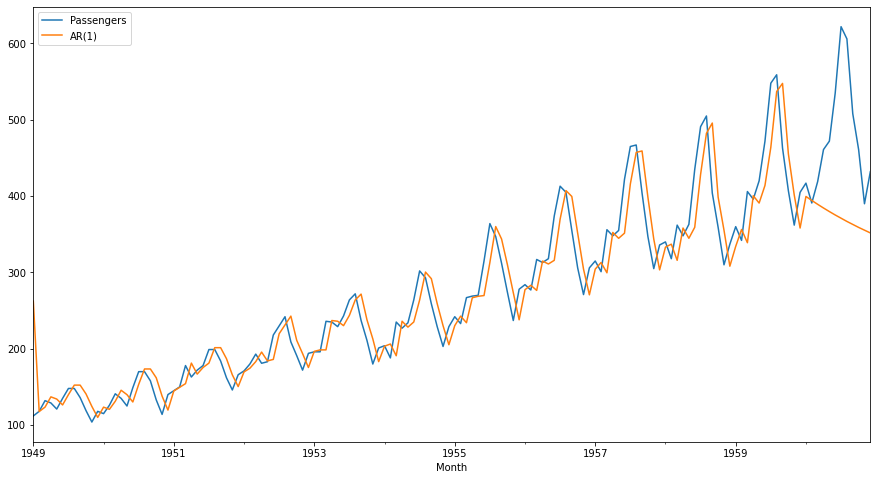

In [33]:
df[["Passengers","AR(1)"]].plot(figsize=(15,8))

In [34]:
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [35]:
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338255,499.534230
1960-05-01,253.432283,506.121348
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201639
1960-08-01,215.354569,518.324977
1960-09-01,204.941150,520.764225
1960-10-01,195.386337,522.649550


In [36]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['Passengers'], label='data')

    # plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    # forecast the test set
    prediction_result = result.get_forecast(N_test)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index,
                    lower, upper,
                    color='red', alpha=0.3)
    ax.legend()

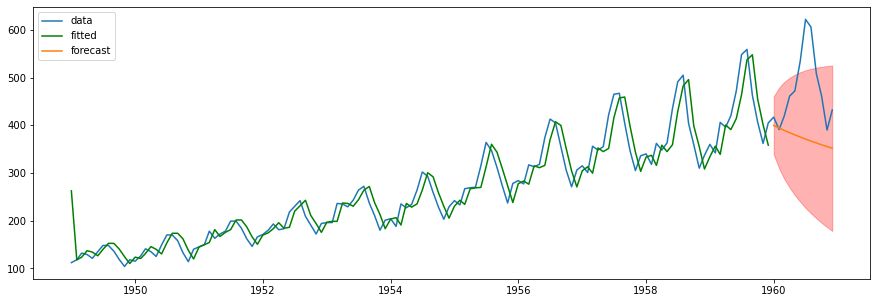

In [37]:
plot_fit_and_forecast(arima_result)

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


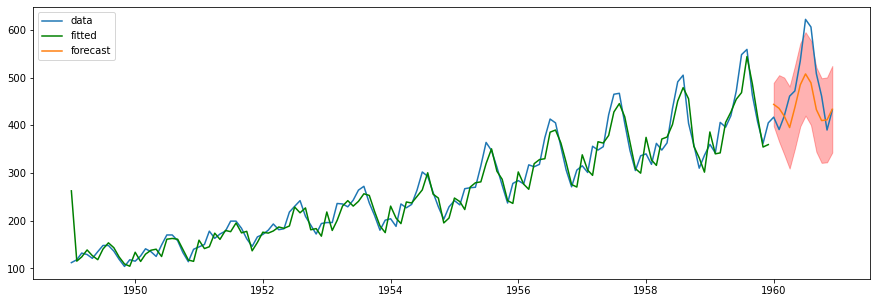

In [39]:
arima=ARIMA(train['Passengers'],order=(10,0,0))
arima_result=arima.fit()
plot_fit_and_forecast(arima_result)

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


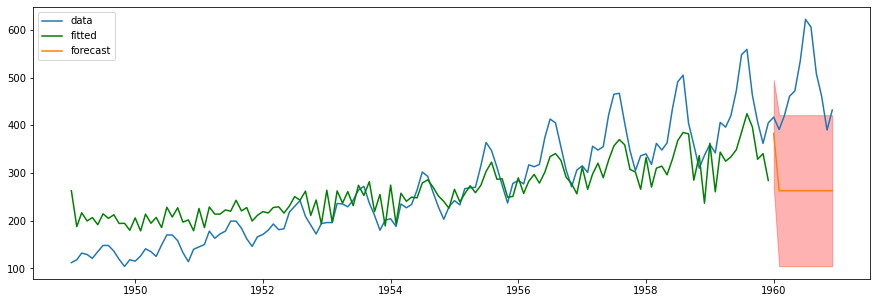

In [40]:
arima=ARIMA(train['Passengers'],order=(0,0,1)) #MA1
arima_result=arima.fit()
plot_fit_and_forecast(arima_result)

In [41]:
df["Log1stdiff"]=df["LogPassengers"].diff()

<AxesSubplot:xlabel='Month'>

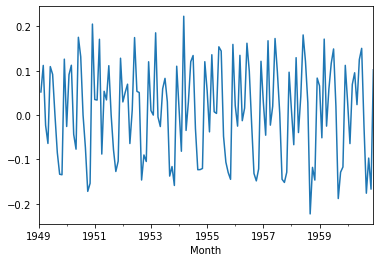

In [42]:
df["Log1stdiff"].plot()

In [43]:
arima=ARIMA(train['Passengers'],order=(8,1,1)) #MA1
arima_result_811=arima.fit()

In [46]:
def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df[col], label='data')

    # plot the curve fitted on train set
    train_pred = result.predict(start=train.index[d], end=train.index[-1])

    ax.plot(train.index[d:], train_pred, color='green', label='fitted')

    # forecast the test set
    prediction_result = result.get_forecast(N_test)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index,
                    lower, upper,
                    color='red', alpha=0.3)
    ax.legend()

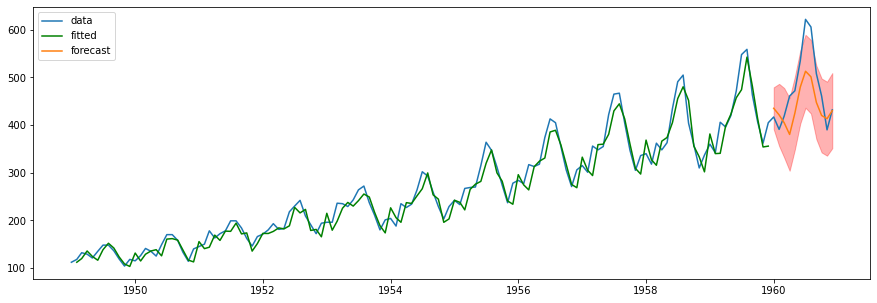

In [47]:
plot_fit_and_forecast_int(arima_result_811, 1)

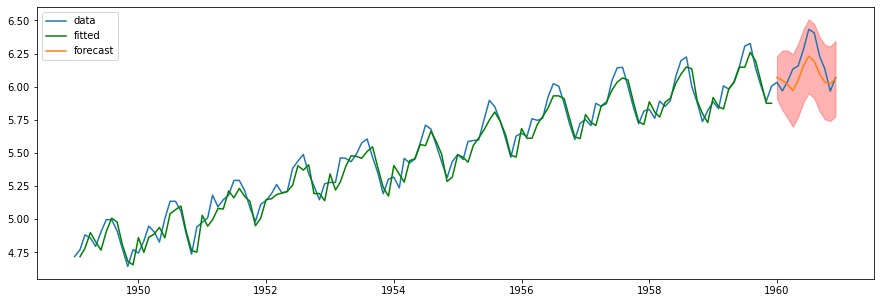

In [48]:
arima=ARIMA(train['LogPassengers'],order=(8,1,1)) #MA1
arima_result_log811=arima.fit()
plot_fit_and_forecast_int(arima_result_log811,1,col="LogPassengers")

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyError: 'lower Passengers'

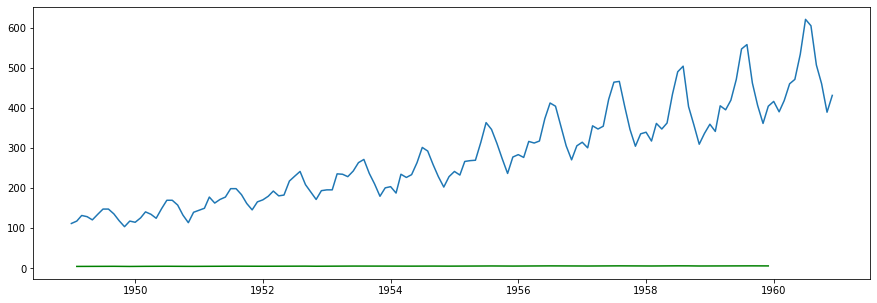

In [54]:
arima=ARIMA(train['Passengers'],order=(12,1,0)) #MA1
arima_result_1210=arima.fit()
plot_fit_and_forecast_int(arima_result_log1210,1,col="Passengers")

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


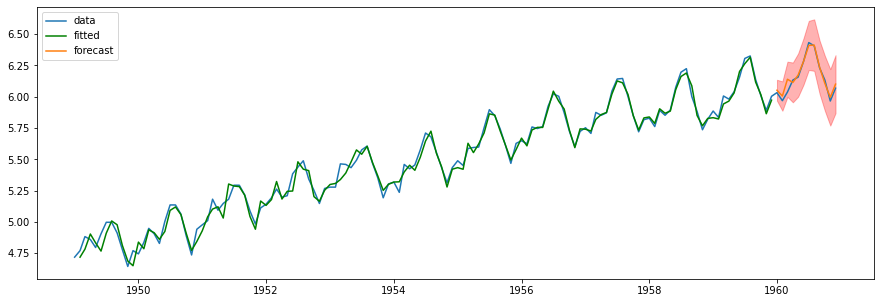

In [55]:
arima=ARIMA(train['LogPassengers'],order=(12,1,0)) #MA1
arima_result_log1210=arima.fit()
plot_fit_and_forecast_int(arima_result_log1210,1,col="LogPassengers")

In [56]:
def rmse(result, is_logged):
    forecast = result.forecast(N_test)
    if is_logged:
        forecast = np.exp(forecast)

    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t - y)**2))

In [57]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.06458461845634
ARIMA(8,1,1) logged: 61.602497086917204
ARIMA(12,1,0): 17.48407093276057
ARIMA(12,1,0) logged: 16.159767443012655
